In [13]:
# import dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [14]:
# create file path and create DataFrame from the file
path_2 = "Resources/enter_2007.csv"
df = pd.read_csv(path_2,skiprows =1)

# view the total list of columns
pd.options.display.max_columns = 100
# print(pd.options.display.max_columns)

# view first 5 rows of the data
df.head()

,Geographic identifier code,Id2,Geographic area name,2007 NAICS code,Meaning of 2007 NAICS code,Gender code,Meaning of Gender code,Ethnicity code,Meaning of Ethnicity code,Race code,Meaning of Race code,Year,Number of firms with or without paid employees,"Sales, receipts, or value of shipments of firms with or without paid employees ($1,000)",Number of firms with paid employees,"Sales, receipts, or value of shipments of firms with paid employees ($1,000)",Number of paid employees for pay period including March 12,"Annual payroll ($1,000)",Number of firms without paid employees,"Sales, receipts, or value of shipments of firms without paid employees ($1,000)",Relative standard error of number of firms with or without paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms with or without paid employees (%)",Relative standard error of number of firms with paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms with paid employees (%)",Relative standard error of number of paid employees for pay period including March 12 (%),Relative standard error of annual payroll (%),Relative standard error of number of firms without paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms without paid employees (%)"
0,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,0,All firms,2007,382350,408238540,75272,394526507,1614098,55775009,307078,13712033,0,1,1,1,1,1,1,3
1,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,30,White,2007,305324,150719683,61769,138612841,815246,24977592,243555,12106842,1,1,1,1,2,1,1,4
2,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,40,Black or African American,2007,56712,2152418,2098,1258658,16724,372545,54614,893760,1,4,6,7,10,8,1,5
3,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,50,American Indian and Alaska Native,2007,3068,650084,422,553537,5254,138712,2646,96547,8,7,14,8,11,8,11,16
4,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,60,Asian,2007,6908,2620074,2447,2391748,17993,482413,4460,228326,5,7,4,7,6,5,7,11


In [15]:
# Rename the columns for ease of use in our code
df = df.rename(columns={"Geographic area name":"State","Meaning of 2007 NAICS code":"Sector", 
                        "Meaning of Gender code":"Gender owned", "Meaning of Race code": "Race",
                         "Number of firms with or without paid employees":"Number of Firms",
                         "Sales, receipts, or value of shipments of firms with or without paid employees ($1,000)":"Total Firm Sales",
                         "Number of firms with paid employees":"Paid Emp Firms", "Sales, receipts, or value of shipments of firms with paid employees ($1,000)":"Paid Emp Sales",
                         "Annual payroll ($1,000)":"Annual Payroll", "Number of firms without paid employees":"Unpaid Emp Firms",
                         "Sales, receipts, or value of shipments of firms without paid employees ($1,000)": "Unpaid Emp Sales", "Meaning of Ethnicity code":"Ethnicity",
                        "Number of paid employees for pay period including March 12":"Total Paid Emp"
                        })
df.head()

,Geographic identifier code,Id2,State,2007 NAICS code,Sector,Gender code,Gender owned,Ethnicity code,Ethnicity,Race code,Race,Year,Number of Firms,Total Firm Sales,Paid Emp Firms,Paid Emp Sales,Total Paid Emp,Annual Payroll,Unpaid Emp Firms,Unpaid Emp Sales,Relative standard error of number of firms with or without paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms with or without paid employees (%)",Relative standard error of number of firms with paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms with paid employees (%)",Relative standard error of number of paid employees for pay period including March 12 (%),Relative standard error of annual payroll (%),Relative standard error of number of firms without paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms without paid employees (%)"
0,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,0,All firms,2007,382350,408238540,75272,394526507,1614098,55775009,307078,13712033,0,1,1,1,1,1,1,3
1,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,30,White,2007,305324,150719683,61769,138612841,815246,24977592,243555,12106842,1,1,1,1,2,1,1,4
2,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,40,Black or African American,2007,56712,2152418,2098,1258658,16724,372545,54614,893760,1,4,6,7,10,8,1,5
3,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,50,American Indian and Alaska Native,2007,3068,650084,422,553537,5254,138712,2646,96547,8,7,14,8,11,8,11,16
4,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,60,Asian,2007,6908,2620074,2447,2391748,17993,482413,4460,228326,5,7,4,7,6,5,7,11


In [16]:
# Create a new dataframe for selected columns to analyze revenue of firms per state
firms_revenue = df[['State', 'Total Firm Sales', 'Race','Gender owned', 'Ethnicity', 'Sector']]


In [58]:
# Remove all the place holder value "S" from the column Total Firm Sales
firms_revenue1 = firms_revenue.replace({ 'Total Firm Sales' : 'S' },np.NaN)
firms_revenue1.head(2)

,State,Total Firm Sales,Race,Gender owned,Ethnicity,Sector
0,Alabama,408238540,All firms,All firms,All firms,Total for all sectors
1,Alabama,150719683,White,All firms,All firms,Total for all sectors


In [18]:
# Select the total firms sales(Revenue) by State
firms_revenue2 = firms_revenue1.loc[(firms_revenue1['Sector'] == 'Total for all sectors') & (firms_revenue1['Race'] == 'All firms') \
                                        & (firms_revenue1['Ethnicity'] == 'All firms') & (firms_revenue1['Gender owned'] == 'All firms')]


In [20]:
# Get the Top ten values by State for Total firm sales(Revenue)
firms_revenue2['Total Firm Sales'] = firms_revenue2['Total Firm Sales'].astype('int64')
Top_ten_df = firms_revenue2.sort_values(by='Total Firm Sales', ascending=False)
Top_ten_firms = Top_ten_df.head(10)
Top_ten_firms

,State,Total Firm Sales,Race,Gender owned,Ethnicity,Sector
11424,California,3765938643,All firms,All firms,All firms,Total for all sectors
122808,Texas,2621467877,All firms,All firms,All firms,Total for all sectors
91392,New York,2257362689,All firms,All firms,All firms,Total for all sectors
37128,Illinois,1473210665,All firms,All firms,All firms,Total for all sectors
25704,Florida,1467083782,All firms,All firms,All firms,Total for all sectors
108528,Pennsylvania,1175703198,All firms,All firms,All firms,Total for all sectors
99960,Ohio,1114157240,All firms,All firms,All firms,Total for all sectors
85680,New Jersey,1109995739,All firms,All firms,All firms,Total for all sectors
28560,Georgia,923749405,All firms,All firms,All firms,Total for all sectors
62832,Michigan,858127515,All firms,All firms,All firms,Total for all sectors


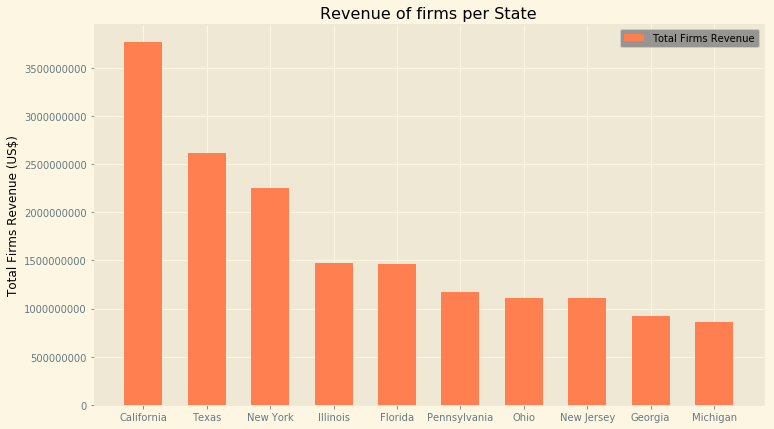

In [22]:
# Plot the Top ten values by State for Total firm sales(Revenue) 
xpos = np.arange(len(Top_ten_firms['State']))
plt.xticks(xpos, Top_ten_firms['State'])
plt.ticklabel_format(style='plain', axis='y', color='black')

plt.ylabel('Total Firms Revenue (US$)', color='black')
# plt.xlabel('States')
plt.title('Revenue of firms per State', color='black')
plt.bar(xpos, Top_ten_firms['Total Firm Sales'], width=0.6,
        label='Total Firms Revenue', facecolor='coral')
legend = plt.legend()
plt.rcParams['figure.figsize']= (12,7)
# fig, ax = plt.subplots(facecolor='lightslategray')
plt.style.use('Solarize_Light2')
legend.get_frame().set_facecolor('grey')
plt.savefig("Output/Revenue_state2007.png")

In [23]:
# Create a new dataframe for selected columns to analyze revenue of Paid and Unpaid Employment firms per state
paid_unpaid = df[['State', 'Race','Gender owned', 'Ethnicity', 
                       'Sector', 'Paid Emp Sales', 'Unpaid Emp Sales']]
paid_unpaid.head()

,State,Race,Gender owned,Ethnicity,Sector,Paid Emp Sales,Unpaid Emp Sales
0,Alabama,All firms,All firms,All firms,Total for all sectors,394526507,13712033
1,Alabama,White,All firms,All firms,Total for all sectors,138612841,12106842
2,Alabama,Black or African American,All firms,All firms,Total for all sectors,1258658,893760
3,Alabama,American Indian and Alaska Native,All firms,All firms,Total for all sectors,553537,96547
4,Alabama,Asian,All firms,All firms,Total for all sectors,2391748,228326


In [24]:
# Select the Paid and Upaid employee firms sales(Revenue) by State
paid_unpaid1 = paid_unpaid.loc[(paid_unpaid['Sector'] == 'Total for all sectors') & (paid_unpaid['Race'] == 'All firms') & 
                                        (paid_unpaid['Ethnicity'] == 'All firms') & (paid_unpaid['Gender owned'] == 'All firms')]


In [25]:
# Get the Top ten values by State for Total firm sales(Revenue)
paid_unpaid1['Unpaid Emp Sales'] = paid_unpaid1['Unpaid Emp Sales'].astype('int64')
paid_unpaid1['Paid Emp Sales'] = paid_unpaid1['Paid Emp Sales'].astype('int64')
Top_ten_emp_df = paid_unpaid1.sort_values(by=('Paid Emp Sales'), ascending=False)
Top_ten_emp = Top_ten_emp_df.head(10)
Top_ten_emp

,State,Race,Gender owned,Ethnicity,Sector,Paid Emp Sales,Unpaid Emp Sales
11424,California,All firms,All firms,All firms,Total for all sectors,3625368574,140570070
122808,Texas,All firms,All firms,All firms,Total for all sectors,2535641982,85825894
91392,New York,All firms,All firms,All firms,Total for all sectors,2186865138,70497551
37128,Illinois,All firms,All firms,All firms,Total for all sectors,1435668963,37541702
25704,Florida,All firms,All firms,All firms,Total for all sectors,1392978846,74104936
108528,Pennsylvania,All firms,All firms,All firms,Total for all sectors,1141135536,34567662
99960,Ohio,All firms,All firms,All firms,Total for all sectors,1085257287,28899953
85680,New Jersey,All firms,All firms,All firms,Total for all sectors,1078576681,31419058
28560,Georgia,All firms,All firms,All firms,Total for all sectors,891385603,32363802
62832,Michigan,All firms,All firms,All firms,Total for all sectors,835113948,23013568


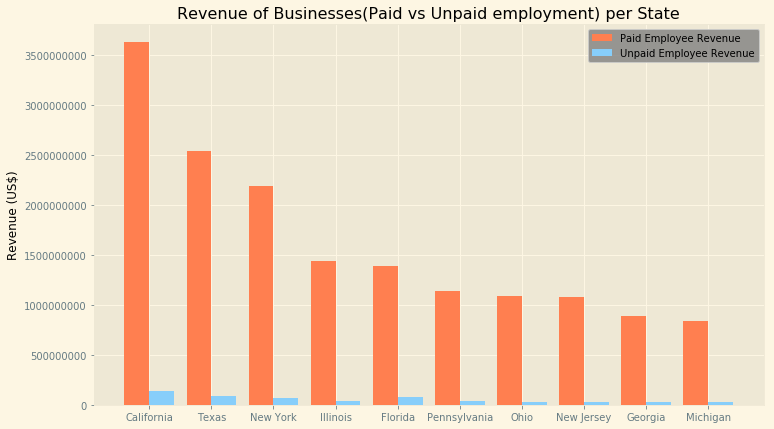

In [26]:
# Plot the Top ten values by State for Paid and Unpaid employee firm sales(Revenue) 
xpos = np.arange(len(Top_ten_emp['State']))
plt.xticks(xpos+0.2, Top_ten_emp['State'])
plt.ticklabel_format(style='plain', axis='y', color='black')

plt.bar(xpos, Top_ten_emp['Paid Emp Sales'], width=0.4,
        label='Paid Employee Revenue', facecolor='coral', align='center')
plt.bar(xpos+0.4, Top_ten_emp['Unpaid Emp Sales'], width=0.4,
        label='Unpaid Employee Revenue', facecolor='lightskyblue', align='center')

plt.title('Revenue of Businesses(Paid vs Unpaid employment) per State', color='black')
plt.ylabel('Revenue (US$)', color='black')

legend = plt.legend()
plt.rcParams['figure.figsize']= (12,7)
plt.style.use('Solarize_Light2')
legend.get_frame().set_facecolor('grey')
plt.savefig("Output/Revenue_state_Paid_Unpaid2007.png")

In [27]:
# Create a new dataframe for selected columns to analyze annual average employment income per state
avg_income = df[['State', 'Race','Gender owned', 'Ethnicity', 
                       'Sector', 'Total Paid Emp', 'Annual Payroll']]
avg_income.head()

,State,Race,Gender owned,Ethnicity,Sector,Total Paid Emp,Annual Payroll
0,Alabama,All firms,All firms,All firms,Total for all sectors,1614098,55775009
1,Alabama,White,All firms,All firms,Total for all sectors,815246,24977592
2,Alabama,Black or African American,All firms,All firms,Total for all sectors,16724,372545
3,Alabama,American Indian and Alaska Native,All firms,All firms,Total for all sectors,5254,138712
4,Alabama,Asian,All firms,All firms,Total for all sectors,17993,482413


In [28]:
# Remove all the place holder values from the columns Total Firm Employees and Total Annal Payroll
avg_income = avg_income.replace({ 'Total Paid Emp' :
                                               ['a','b', 'c', 'e', 'f', 'g', 'h', 'i','S']},np.NaN)
avg_income = avg_income.replace({ 'Annual Payroll' : ['S','D'] },np.NaN)
avg_income = avg_income.replace({ 'Total Paid Emp' : np.NaN },0)
avg_income = avg_income.replace({ 'Annual Payroll' : np.NaN },0)


avg_income['Total Paid Emp'] = avg_income['Total Paid Emp'].astype('int64')
avg_income['Annual Payroll'] = avg_income['Annual Payroll'].astype('int64')

In [29]:
# Calculate the average income by dividing the Total Payroll by the total  number of employees
avg_income['Avg Income'] = avg_income['Annual Payroll']/avg_income['Total Paid Emp']

In [59]:
avg_income.head(2)

,State,Race,Gender owned,Ethnicity,Sector,Total Paid Emp,Annual Payroll,Avg Income
0,Alabama,All firms,All firms,All firms,Total for all sectors,1614098,55775009,34.554909
1,Alabama,White,All firms,All firms,Total for all sectors,815246,24977592,30.638104


In [31]:
# Select the Total annual average income by State
avg_income1 = avg_income.loc[(avg_income['Sector'] == 'Total for all sectors') & (avg_income['Race'] == 'All firms')
                                        & (avg_income['Ethnicity'] == 'All firms') & (avg_income['Gender owned'] == 'All firms')]


In [32]:
# Get the Top ten values by State for Total annual average income by State
Top_ten_avg_df = avg_income1.sort_values(by=('Avg Income'), ascending=False)
Top_ten_avg = Top_ten_avg_df.head(10)
Top_ten_avg

,State,Race,Gender owned,Ethnicity,Sector,Total Paid Emp,Annual Payroll,Avg Income
22848,District of Columbia,All firms,All firms,All firms,Total for all sectors,389799,24255385,62.225365
91392,New York,All firms,All firms,All firms,Total for all sectors,7462672,412902035,55.328981
17136,Connecticut,All firms,All firms,All firms,Total for all sectors,1526757,81026778,53.071168
59976,Massachusetts,All firms,All firms,All firms,Total for all sectors,3082992,153657505,49.840384
85680,New Jersey,All firms,All firms,All firms,Total for all sectors,3631658,179924101,49.543239
11424,California,All firms,All firms,All firms,Total for all sectors,13626644,625614762,45.911140
19992,Delaware,All firms,All firms,All firms,Total for all sectors,389660,17549731,45.038575
57120,Maryland,All firms,All firms,All firms,Total for all sectors,2204374,97557277,44.256227
134232,Washington,All firms,All firms,All firms,Total for all sectors,2429182,107320461,44.179671
37128,Illinois,All firms,All firms,All firms,Total for all sectors,5302469,233661304,44.066510


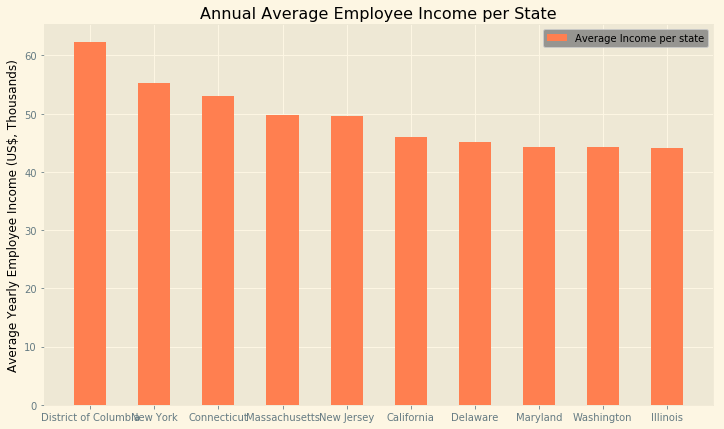

In [33]:
# Plot the Top ten values by State for annual average employee income
xpos = np.arange(len(Top_ten_avg['State']))
plt.xticks(xpos, Top_ten_avg['State'])
plt.ticklabel_format(style='plain', axis='y', color='black')

plt.ylabel('Average Yearly Employee Income (US$, Thousands)', color='black')
# plt.xlabel('States')
plt.title('Annual Average Employee Income per State', color='black')
plt.bar(xpos, Top_ten_avg['Avg Income'], width=0.5,
        label='Average Income per state', facecolor='coral')
legend = plt.legend()
plt.rcParams['figure.figsize']= (15,9)
# fig, ax = plt.subplots(facecolor='lightslategray')
plt.style.use('Solarize_Light2')
legend.get_frame().set_facecolor('grey')
plt.savefig("Output/AvgIncome_state2007.png")

In [34]:
# Select the Total annual average income for firms owned by Men and Women by State
Male_Female = ['Male-owned', 'Female-owned']
avg_income2 = avg_income.loc[(avg_income['Sector'] == 'Total for all sectors') & (avg_income['Race'] == 'All firms')
                                        & (avg_income['Ethnicity'] == 'All firms') & (avg_income['Gender owned'].isin(Male_Female))]


In [35]:
# Get the values for the Top Ten Total annual average income by State for Male and female owned firms
StatesMF = ['District of Columbia', 'New York', 'Connecticut', 'Massachusetts', 'New Jersey',
            'California', 'Delaware', 'Maryland', 'Washington', 'Illinois']
Top_ten_avgMF = avg_income2.loc[(avg_income2['State'].isin(StatesMF))]


In [36]:
#Use a pandas pivot to class your table by Male and Female owned firms
Top_ten_avgMF_o = Top_ten_avgMF[['State', 'Gender owned', 'Avg Income']]
Top_ten_avgMF_n = Top_ten_avgMF_o.pivot(index = 'State', columns = 'Gender owned')
Top_ten_avgMF_n

Avg Income           
Gender owned         Female-owned Male-owned
State                                       
California              31.599104  39.716644
Connecticut             31.260020  46.931806
Delaware                28.048397  35.776398
District of Columbia    39.303978  50.680988
Illinois                31.540774  39.510533
Maryland                33.039134  40.997362
Massachusetts           30.487262  43.600110
New Jersey              32.365395  41.746242
New York                34.487769  44.680041
Washington              28.250448  39.951810

In [37]:
#Reset Index for the result of your pivot table
Top_ten_avgMF_m = pd.DataFrame(Top_ten_avgMF_n.to_records())

Top_ten_avgMF_m


,State,"('Avg Income', 'Female-owned')","('Avg Income', 'Male-owned')"
0,California,31.599104,39.716644
1,Connecticut,31.260020,46.931806
2,Delaware,28.048397,35.776398
3,District of Columbia,39.303978,50.680988
4,Illinois,31.540774,39.510533
5,Maryland,33.039134,40.997362
6,Massachusetts,30.487262,43.600110
7,New Jersey,32.365395,41.746242
8,New York,34.487769,44.680041
9,Washington,28.250448,39.951810


In [38]:
# Rename the column header to by replacing unwanted values in the header.
# note- pandas rename doesn't do this well so use a replace function
Top_ten_avgMF_m.columns = [hdr.replace("('Avg Income', '", "" ).replace("')", "") \
                           for hdr in Top_ten_avgMF_m.columns]

Top_ten_avgMF_m

,State,Female-owned,Male-owned
0,California,31.599104,39.716644
1,Connecticut,31.260020,46.931806
2,Delaware,28.048397,35.776398
3,District of Columbia,39.303978,50.680988
4,Illinois,31.540774,39.510533
5,Maryland,33.039134,40.997362
6,Massachusetts,30.487262,43.600110
7,New Jersey,32.365395,41.746242
8,New York,34.487769,44.680041
9,Washington,28.250448,39.951810


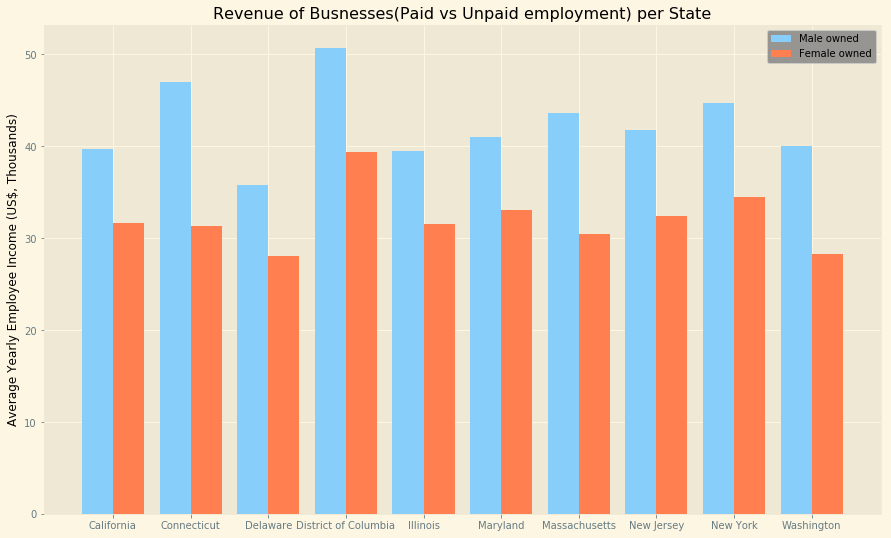

In [39]:
# Plot the values by State for annual average employee income for Male and Female owned businesses
xpos = np.arange(len(Top_ten_avgMF_m['State']))
plt.xticks(xpos+0.2, Top_ten_avgMF_m['State'])
plt.ticklabel_format(style='plain', axis='y', color='black')

plt.bar(xpos, Top_ten_avgMF_m['Male-owned'],width=0.4,
        label='Male owned', facecolor='lightskyblue', align='center')
plt.bar(xpos+0.4, Top_ten_avgMF_m['Female-owned'], width=0.4,
        label='Female owned', facecolor='coral', align='center')

plt.title('Revenue of Busnesses(Paid vs Unpaid employment) per State', color='black')
plt.ylabel('Average Yearly Employee Income (US$, Thousands)', color='black')

legend = plt.legend()
plt.rcParams['figure.figsize']= (15,9)
plt.style.use('Solarize_Light2')
legend.get_frame().set_facecolor('grey')
plt.savefig("Output/AvgIncome__MFstate2007.png")

In [40]:
# create file path and create DataFrame from the file
path_3 = "Resources/enter_2012.csv"
df_2 = pd.read_csv(path_3,skiprows =1)

# view the total list of columns
pd.options.display.max_columns = 100
# print(pd.options.display.max_columns)

# view first 5 rows of the data
df_2.head()

,Geographic identifier code,Id2,Geographic area name,2012 NAICS code,Meaning of 2012 NAICS code,Gender code,Meaning of Gender code,Ethnicity code,Meaning of Ethnicity code,Race code,Meaning of Race code,Year,Number of firms with or without paid employees,"Sales, receipts, or value of shipments of firms with or without paid employees ($1,000)",Number of firms with paid employees,"Sales, receipts, or value of shipments of firms with paid employees ($1,000)",Number of paid employees for pay period including March 12,"Annual payroll ($1,000)",Number of firms without paid employees,"Sales, receipts, or value of shipments of firms without paid employees ($1,000)",Relative standard error of number of firms with or without paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms with or without paid employees (%)",Relative standard error of number of firms with paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms with paid employees (%)",Relative standard error of number of paid employees for pay period including March 12 (%),Relative standard error of annual payroll (%),Relative standard error of number of firms without paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms without paid employees (%)"
0,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,0,All firms,2012,374153,410217329,67449,397528241,1503375,57623419,306704,12689088,0.2,0.7,0.3,0.7,1.2,0.8,0.2,1.5
1,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,30,White,2012,279625,150946701,55909,140335944,742663,25480546,223716,10610757,0.4,1.9,0.6,2.0,2.5,1.8,0.4,2.3
2,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,40,Black or African American,2012,73015,3087663,1907,1956020,15814,436107,71109,1131644,0.6,5.8,5.7,7.9,9.9,13.0,0.6,7.0
3,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,50,American Indian and Alaska Native,2012,3895,1291808,468,1199912,4698,169299,3427,91896,7.7,44.1,16.7,49.6,14.2,18.0,8.0,8.4
4,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,60,Asian,2012,9353,4617052,3431,4305282,27863,769114,5922,311771,2.9,3.2,4.3,3.5,5.2,8.9,2.7,7.1


In [41]:
# Rename the columns for ease of use in our code
df_2 = df_2.rename(columns={"Geographic area name":"State","Meaning of 2012 NAICS code":"Sector", 
                        "Meaning of Gender code":"Gender owned", "Meaning of Race code": "Race",
                         "Number of firms with or without paid employees":"Number of Firms",
                         "Sales, receipts, or value of shipments of firms with or without paid employees ($1,000)":"Total Firm Sales",
                         "Number of firms with paid employees":"Paid Emp Firms", "Sales, receipts, or value of shipments of firms with paid employees ($1,000)":"Paid Emp Sales",
                         "Annual payroll ($1,000)":"Annual Payroll", "Number of firms without paid employees":"Unpaid Emp Firms",
                         "Sales, receipts, or value of shipments of firms without paid employees ($1,000)": "Unpaid Emp Sales", "Meaning of Ethnicity code":"Ethnicity",
                        "Number of paid employees for pay period including March 12":"Total Paid Emp"
                        })
df_2.head()

,Geographic identifier code,Id2,State,2012 NAICS code,Sector,Gender code,Gender owned,Ethnicity code,Ethnicity,Race code,Race,Year,Number of Firms,Total Firm Sales,Paid Emp Firms,Paid Emp Sales,Total Paid Emp,Annual Payroll,Unpaid Emp Firms,Unpaid Emp Sales,Relative standard error of number of firms with or without paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms with or without paid employees (%)",Relative standard error of number of firms with paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms with paid employees (%)",Relative standard error of number of paid employees for pay period including March 12 (%),Relative standard error of annual payroll (%),Relative standard error of number of firms without paid employees (%),"Relative standard error of sales, receipts, or value of shipments of firms without paid employees (%)"
0,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,0,All firms,2012,374153,410217329,67449,397528241,1503375,57623419,306704,12689088,0.2,0.7,0.3,0.7,1.2,0.8,0.2,1.5
1,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,30,White,2012,279625,150946701,55909,140335944,742663,25480546,223716,10610757,0.4,1.9,0.6,2.0,2.5,1.8,0.4,2.3
2,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,40,Black or African American,2012,73015,3087663,1907,1956020,15814,436107,71109,1131644,0.6,5.8,5.7,7.9,9.9,13.0,0.6,7.0
3,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,50,American Indian and Alaska Native,2012,3895,1291808,468,1199912,4698,169299,3427,91896,7.7,44.1,16.7,49.6,14.2,18.0,8.0,8.4
4,0400000US01,1,Alabama,00,Total for all sectors,1,All firms,1,All firms,60,Asian,2012,9353,4617052,3431,4305282,27863,769114,5922,311771,2.9,3.2,4.3,3.5,5.2,8.9,2.7,7.1


In [42]:
# Create a new dataframe for selected columns to analyze revenue of firms per state
firms_revenue3 = df_2[['State', 'Total Firm Sales', 'Race','Gender owned', 'Ethnicity', 'Sector']]

# Remove all the place holder value "S" from the column Total Firm Sales
firms_revenue4 = firms_revenue3.replace({ 'Total Firm Sales' : 'S' },np.NaN)
firms_revenue4

,State,Total Firm Sales,Race,Gender owned,Ethnicity,Sector
0,Alabama,410217329,All firms,All firms,All firms,Total for all sectors
1,Alabama,150946701,White,All firms,All firms,Total for all sectors
2,Alabama,3087663,Black or African American,All firms,All firms,Total for all sectors
3,Alabama,1291808,American Indian and Alaska Native,All firms,All firms,Total for all sectors
4,Alabama,4617052,Asian,All firms,All firms,Total for all sectors
5,Alabama,1977640,Asian Indian,All firms,All firms,Total for all sectors
6,Alabama,447485,Chinese,All firms,All firms,Total for all sectors
7,Alabama,106963,Filipino,All firms,All firms,Total for all sectors
8,Alabama,53048,Japanese,All firms,All firms,Total for all sectors
9,Alabama,1361684,Korean,All firms,All firms,Total for all sectors


In [43]:
firms_revenue5 = firms_revenue4.loc[(firms_revenue4['Sector'] == 'Total for all sectors') & (firms_revenue4['Race'] == 'All firms') \
                                        & (firms_revenue4['Ethnicity'] == 'All firms') & (firms_revenue4['Gender owned'] == 'All firms')]
# Get the Top ten values by State for Total firm sales(Revenue)
firms_revenue5['Total Firm Sales'] = firms_revenue5['Total Firm Sales'].astype('int64')
Top_ten_df1 = firms_revenue5.sort_values(by='Total Firm Sales', ascending=False)
Top_ten_firms1 = Top_ten_df1.head(10)
Top_ten_firms1

,State,Total Firm Sales,Race,Gender owned,Ethnicity,Sector
11424,California,3917367474,All firms,All firms,All firms,Total for all sectors
122808,Texas,3623481905,All firms,All firms,All firms,Total for all sectors
91392,New York,2184220670,All firms,All firms,All firms,Total for all sectors
37128,Illinois,1683129252,All firms,All firms,All firms,Total for all sectors
25704,Florida,1516846612,All firms,All firms,All firms,Total for all sectors
108528,Pennsylvania,1366843438,All firms,All firms,All firms,Total for all sectors
85680,New Jersey,1233058233,All firms,All firms,All firms,Total for all sectors
99960,Ohio,1204964794,All firms,All firms,All firms,Total for all sectors
62832,Michigan,1005215114,All firms,All firms,All firms,Total for all sectors
28560,Georgia,960432488,All firms,All firms,All firms,Total for all sectors


In [44]:
merged_firms_number = pd.merge(Top_ten_firms, Top_ten_firms1, on="State")
merged_firms_number = merged_firms_number[["State", "Total Firm Sales_x", "Total Firm Sales_y"]]
merged_firms_number = merged_firms_number.rename(columns = {"Total Firm Sales_x":"Revenue_2007","Total Firm Sales_y":"Revenue_2012"})
merged_firms_number

,State,Revenue_2007,Revenue_2012
0,California,3765938643,3917367474
1,Texas,2621467877,3623481905
2,New York,2257362689,2184220670
3,Illinois,1473210665,1683129252
4,Florida,1467083782,1516846612
5,Pennsylvania,1175703198,1366843438
6,Ohio,1114157240,1204964794
7,New Jersey,1109995739,1233058233
8,Georgia,923749405,960432488
9,Michigan,858127515,1005215114


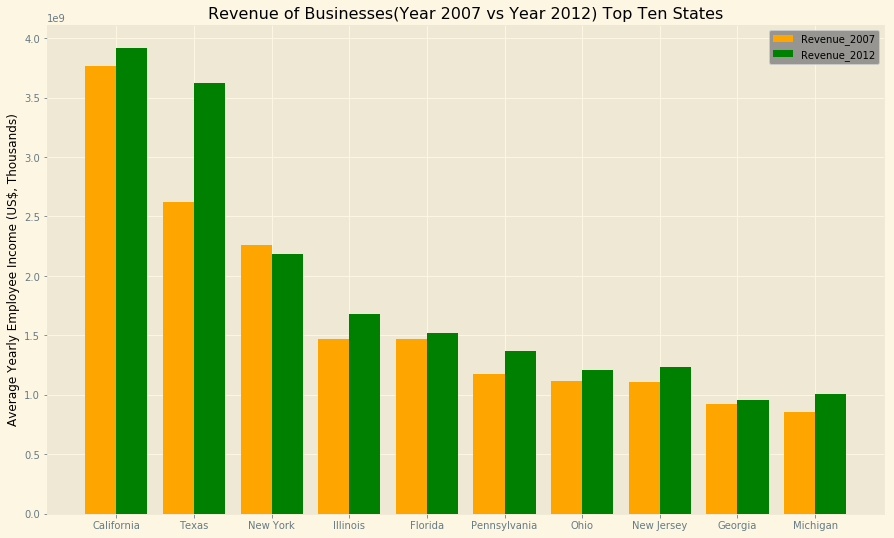

In [46]:
# Plot the values by State for annual average employee income for Male and Female owned businesses
xpos = np.arange(len(merged_firms_number['State']))
plt.xticks(xpos+0.2, merged_firms_number['State'])
# plt.ticklabel_format(style='plain', axis='y', color='black')

plt.bar(xpos, merged_firms_number['Revenue_2007'],width=0.4,
        label='Revenue_2007', facecolor='orange', align='center')
plt.bar(xpos+0.4, merged_firms_number['Revenue_2012'], width=0.4,
        label='Revenue_2012', facecolor='green', align='center')

plt.title('Revenue of Businesses(Year 2007 vs Year 2012) Top Ten States', color='black')
plt.ylabel('Average Yearly Employee Income (US$, Thousands)', color='black')

legend = plt.legend()
plt.rcParams['figure.figsize']= (15,9)
plt.style.use('Solarize_Light2')
legend.get_frame().set_facecolor('grey')
plt.savefig("Output/Revenue__2007_2012.png")

In [47]:
#Filter the orginal dataframe to the colomns(dataset) of interest. [state, sector, gender owned, race,ethinicity]
df_new=df[['State','Sector','Gender owned','Race', 'Ethnicity','Number of Firms']]
#convert the Numeric data from string to integer
df_new['Number of Firms']=pd.to_numeric(df_new['Number of Firms'],errors='coerce')
df_new


,State,Sector,Gender owned,Race,Ethnicity,Number of Firms
0,Alabama,Total for all sectors,All firms,All firms,All firms,382350.0
1,Alabama,Total for all sectors,All firms,White,All firms,305324.0
2,Alabama,Total for all sectors,All firms,Black or African American,All firms,56712.0
3,Alabama,Total for all sectors,All firms,American Indian and Alaska Native,All firms,3068.0
4,Alabama,Total for all sectors,All firms,Asian,All firms,6908.0
5,Alabama,Total for all sectors,All firms,Asian Indian,All firms,1919.0
6,Alabama,Total for all sectors,All firms,Chinese,All firms,942.0
7,Alabama,Total for all sectors,All firms,Filipino,All firms,309.0
8,Alabama,Total for all sectors,All firms,Japanese,All firms,415.0
9,Alabama,Total for all sectors,All firms,Korean,All firms,825.0


In [48]:
df_b= df_new.loc[(df_new['Sector']=='Total for all sectors') &  (df_new['Race']=='All firms') &(df_new['Gender owned']=='All firms') & (df_new['Ethnicity']=='All firms')]
df_b['Number of Firms']=pd.to_numeric(df_b['Number of Firms'],errors='coerce')
df_b=df_b.sort_values('Number of Firms', ascending= False)
df_b
df_plot = df_b.head(10)
df_plot.reset_index(inplace=True)
df_plot
#df_plot['Number of Firms']

,index,State,Sector,Gender owned,Race,Ethnicity,Number of Firms
0,11424,California,Total for all sectors,All firms,All firms,All firms,3425510.0
1,122808,Texas,Total for all sectors,All firms,All firms,All firms,2164852.0
2,25704,Florida,Total for all sectors,All firms,All firms,All firms,2009589.0
3,91392,New York,Total for all sectors,All firms,All firms,All firms,1956733.0
4,37128,Illinois,Total for all sectors,All firms,All firms,All firms,1123817.0
5,108528,Pennsylvania,Total for all sectors,All firms,All firms,All firms,981501.0
6,28560,Georgia,Total for all sectors,All firms,All firms,All firms,901105.0
7,99960,Ohio,Total for all sectors,All firms,All firms,All firms,897939.0
8,62832,Michigan,Total for all sectors,All firms,All firms,All firms,816972.0
9,94248,North Carolina,Total for all sectors,All firms,All firms,All firms,798791.0


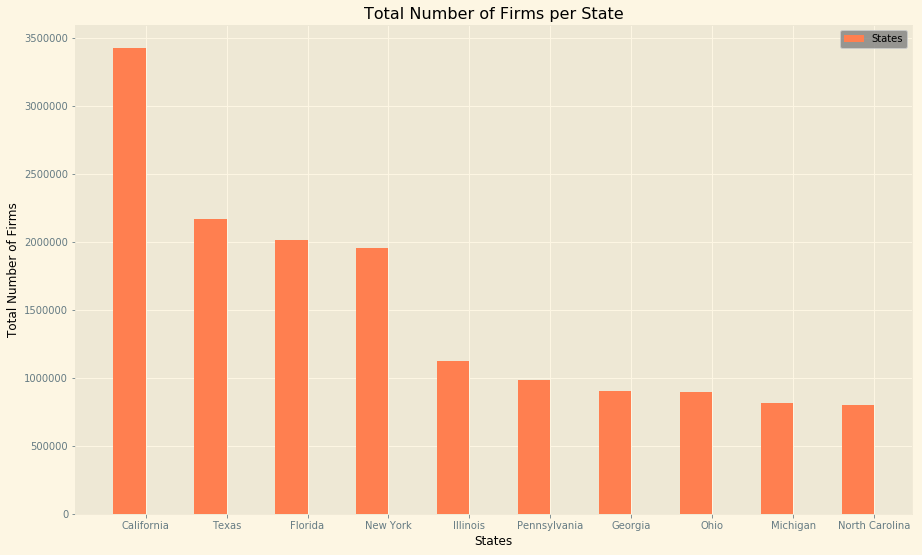

In [49]:
xpos = np.arange(len(df_plot['State']))
ypos = df_plot['Number of Firms']
#plt.yticks(xpos+0.2, df_plot['Number of Firms'])
plt.xticks(xpos+0.2, df_plot['State'])
#plt.ticklabel_format(style='plain', axis='y', color='black')
plt.bar(xpos, ypos, width=0.4,
        label='States', facecolor='coral', align='center')
#plt.bar(xpos+0.4, Top_ten_emp['Number of Firms'], width=0.4,
       #label='Number of Firms', facecolor='lightskyblue', align='center')

plt.title('Total Number of Firms per State', color='black')
plt.ylabel(('Total Number of Firms'), color='black')
plt.xlabel(('States'), color='black')
legend = plt.legend()
plt.rcParams['figure.figsize']= (12,7)
plt.style.use('Solarize_Light2')
legend.get_frame().set_facecolor('grey')
# plt.savefig("Output/state_vs_Number of firms.png")

In [50]:
df_new

,State,Sector,Gender owned,Race,Ethnicity,Number of Firms
0,Alabama,Total for all sectors,All firms,All firms,All firms,382350.0
1,Alabama,Total for all sectors,All firms,White,All firms,305324.0
2,Alabama,Total for all sectors,All firms,Black or African American,All firms,56712.0
3,Alabama,Total for all sectors,All firms,American Indian and Alaska Native,All firms,3068.0
4,Alabama,Total for all sectors,All firms,Asian,All firms,6908.0
5,Alabama,Total for all sectors,All firms,Asian Indian,All firms,1919.0
6,Alabama,Total for all sectors,All firms,Chinese,All firms,942.0
7,Alabama,Total for all sectors,All firms,Filipino,All firms,309.0
8,Alabama,Total for all sectors,All firms,Japanese,All firms,415.0
9,Alabama,Total for all sectors,All firms,Korean,All firms,825.0


<BarContainer object of 5 artists>

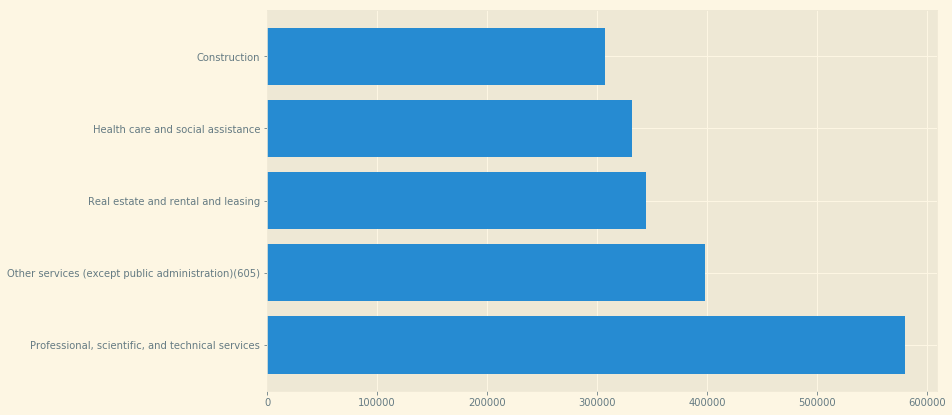

In [51]:
df_d= df_new.loc[(df_new['Sector']!='Total for all sectors')  &  (df_new['Race']=='All firms') &(df_new['Gender owned']=='All firms') & (df_new['Ethnicity']=='All firms')]
#df_new['Number of Firms']= df_new['Number of Firms'].astype(int)
#df_d=df_d.sort_values('Firms', ascending= False)
df_d = df_d[df_d['Number of Firms'] == df_d.groupby(['Sector'])['Number of Firms'].transform(max)]
#df_e=df_d.pivot_table(index=['State','Sector'], values =['Number of Firms'],aggfunc=max)
df_d=df_d.sort_values('Number of Firms', ascending= False)
#df_f=df_e.drop(index=['Industries not classified','Mining, quarrying, and oil and gas extraction'], level=1)
dfd_plot_h = df_d.head(5)
dfd_plot_t = df_d.tail(5)
dfd_plot_h.reset_index(inplace=True)
dfd_plot_t
dfd_plot_h
plt.barh(dfd_plot_h["Sector"],dfd_plot_h["Number of Firms"])

# maxim =0
# for index,row in df_e.iterrows():
#     if  df_new['Firms'] > maxim:
#          df_new['Firms']=maxim
#     print(index, row['Firms'])


<BarContainer object of 5 artists>

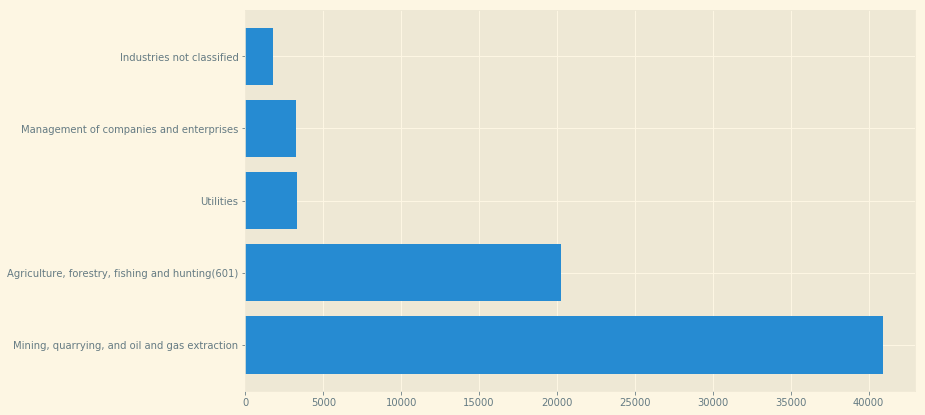

In [52]:
df_d= df_new.loc[(df_new['Sector']!='Total for all sectors')  &  (df_new['Race']=='All firms') &(df_new['Gender owned']=='All firms') & (df_new['Ethnicity']=='All firms')]
#df_new['Number of Firms']= df_new['Number of Firms'].astype(int)
#df_d=df_d.sort_values('Firms', ascending= False)
df_d = df_d[df_d['Number of Firms'] == df_d.groupby(['Sector'])['Number of Firms'].transform(max)]
#df_e=df_new.pivot_table(index=['State','Sector'], values =['Number of Firms'],aggfunc=max)
df_d=df_d.sort_values('Number of Firms', ascending= False)
#df_f=df_e.drop(index=['Industries not classified','Mining, quarrying, and oil and gas extraction'], level=1)
dfd_plot_t = df_d.tail(5)
dfd_plot_t.reset_index(inplace=True)

plt.barh(dfd_plot_t["Sector"],dfd_plot_t["Number of Firms"])

# maxim =0
# for index,row in df_e.iterrows():
#     if  df_new['Firms'] > maxim:
#          df_new['Firms']=maxim
#     print(index, row['Firms'])


In [53]:
dfz = df_d[df_d['Number of Firms'] == df_d.groupby(['Sector'])['Number of Firms'].transform(max)]
dfz=dfz.sort_values('Number of Firms', ascending= False)
dfz
# dfz_plot= dfz.head(10)
# xpos = np.arange(len(dfz_plot['Sector']))
# ypos = dfz_plot['Sector']
# #plt.yticks(xpos+0.2, df_plot['Number of Firms'])
# plt.xticks(ypos+0.2, dfz_plot['Number of Firms'])
# #plt.ticklabel_format(style='plain', axis='y', color='black')
# plt.barh(ypos, xpos, width=0.4,
#         label='Number of Firms', facecolor='coral', align='center')
# #plt.bar(xpos+0.4, Top_ten_emp['Number of Firms'], width=0.4,
#        #label='Number of Firms', facecolor='lightskyblue', align='center')

# plt.title('Revenue of Frims per Sector', color='black')
# plt.ylabel(('Total Revenue (US$)'), color='black')
# plt.xlabel(('Sector'), color='black')
# legend = plt.legend()
# plt.rcParams['figure.figsize']= (12,7)
# plt.style.use('Solarize_Light2')
# legend.get_frame().set_facecolor('grey')
# plt.savefig("Output/state_vs_Number of firms.png")

,State,Sector,Gender owned,Race,Ethnicity,Number of Firms
13056,California,"Professional, scientific, and technical services",All firms,All firms,All firms,579994.0
14008,California,Other services (except public administration)(...,All firms,All firms,All firms,398417.0
12920,California,Real estate and rental and leasing,All firms,All firms,All firms,344342.0
13600,California,Health care and social assistance,All firms,All firms,All firms,331590.0
123352,Texas,Construction,All firms,All firms,All firms,306793.0
12376,California,Retail trade,All firms,All firms,All firms,305808.0
13328,California,Administrative and support and waste managemen...,All firms,All firms,All firms,255952.0
13736,California,"Arts, entertainment, and recreation",All firms,All firms,All firms,190038.0
12512,California,Transportation and warehousing(603),All firms,All firms,All firms,144399.0
12784,California,Finance and insurance(604),All firms,All firms,All firms,123222.0


<BarContainer object of 10 artists>

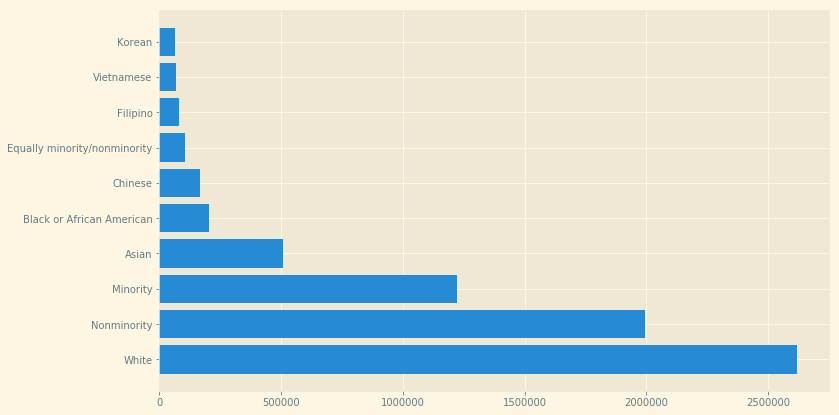

In [54]:
df_race= df_new.loc[(df_new['Sector']=='Total for all sectors')  &  (df_new['Race']!='All firms')  &(df_new['Race']!='All firms classifiable by gender, ethnicity, race, and veteran status')&(df_new['Race']!='Publicly held and other firms not classifiable by gender, ethnicity, race, and veteran status')&(df_new['Gender owned']=='All firms') & (df_new['Ethnicity']=='All firms')]
df_race['Number of Firms']=pd.to_numeric(df_race['Number of Firms'],errors='coerce')
dfzr = df_race[df_race['Number of Firms'] == df_race.groupby(['Race'])['Number of Firms'].transform(max)]
dfzr=dfzr.sort_values('Number of Firms', ascending= False)
dfzr_plot=dfzr.head(10)
dfzr_plot

dfzr_plot.reset_index(inplace=True)

plt.barh(dfzr_plot["Race"],dfzr_plot["Number of Firms"])





<BarContainer object of 3 artists>

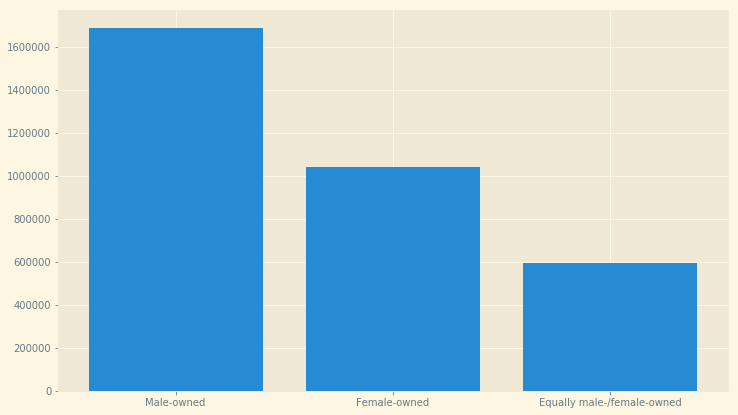

In [55]:
#df_gen= df_new.loc[(df_new['Sector']=='Total for all sectors')  &  (df_new['Race']=='All firms')  & (df_new['Ethnicity']=='All firms')&(df_new['Gender owned']!='All firms classifiable by gender, ethnicity, race, and veteran status') |(df_new['Gender owned']!='Publicly held and other firms not classifiable by gender, ethnicity, race, and veteran status')]
df_gen= df_new.loc[(df_new['Sector']=='Total for all sectors')  &  (df_new['Race']=='All firms')  & (df_new['Ethnicity']=='All firms')&(df_new['Gender owned']=='Female-owned')|(df_new['Gender owned']=='Male-owned') |(df_new['Gender owned']=='Equally male-/female-owned')]


#df_gent=df_gen['Gender owned']
#loc['Publicly held and other firms not classifiable by gender, ethnicity, race, and veteran status','All firms classifiable by gender, ethnicity, race, and veteran status']
#.drop(['Publicly held and other firms not classifiable by gender, ethnicity, race, and veteran status','All firms classifiable by gender, ethnicity, race, and veteran status'],axis=0)
df_gen=df_gen.groupby(['Gender owned']).agg({"Number of Firms": "max"})
df_gen=df_gen.sort_values('Number of Firms', ascending= False)
#dfzg
df_gen

df_gen.reset_index(inplace=True)
df_gen

plt.bar(df_gen["Gender owned"],df_gen["Number of Firms"])


In [56]:
df_d


,State,Sector,Gender owned,Race,Ethnicity,Number of Firms
13056,California,"Professional, scientific, and technical services",All firms,All firms,All firms,579994.0
14008,California,Other services (except public administration)(...,All firms,All firms,All firms,398417.0
12920,California,Real estate and rental and leasing,All firms,All firms,All firms,344342.0
13600,California,Health care and social assistance,All firms,All firms,All firms,331590.0
123352,Texas,Construction,All firms,All firms,All firms,306793.0
12376,California,Retail trade,All firms,All firms,All firms,305808.0
13328,California,Administrative and support and waste managemen...,All firms,All firms,All firms,255952.0
13736,California,"Arts, entertainment, and recreation",All firms,All firms,All firms,190038.0
12512,California,Transportation and warehousing(603),All firms,All firms,All firms,144399.0
12784,California,Finance and insurance(604),All firms,All firms,All firms,123222.0


In [57]:
df_e=df_new.pivot_table(index=['State','Sector'], values =['Number of Firms'],aggfunc=max)
df_e.loc['Maryland']


,Number of Firms
Sector,
Accommodation and food services,14022.0
Administrative and support and waste management and remediation services,41563.0
"Agriculture, forestry, fishing and hunting(601)",3529.0
"Arts, entertainment, and recreation",25104.0
Construction,59602.0
Educational services,14898.0
Finance and insurance(604),17707.0
Health care and social assistance,56411.0
Industries not classified,133.0
